In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df = pd.read_csv("tsl_dataset.csv")
df = df[["Date", "Season", "Week", "home", "visitor", "FT", "hgoal", "vgoal", "hgoal_half", "vgoal_half", "fans", "home_red_card", "visitor_red_card"]]
df.head()

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,division,tier,...,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,fans,neutral,home_red_card,visitor_red_card
0,1959-02-21,1958,1,Genclerbirligi,Adalet,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
1,1959-02-21,1958,1,Izmirspor,Beykoz 1908,2-1,2,1,T1,1,...,2-0,2,0,2,2,H,1,0,0,0
2,1959-02-21,1958,1,Ankara Demirspor,Galatasaray,0-2,0,2,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0
3,1959-02-21,1958,1,Fenerbahce,MKE Ankaragucu,3-1,3,1,T1,1,...,1-1,1,1,2,0,D,1,0,0,0
4,1959-02-21,1958,1,Altay,Besiktas,1-2,1,2,T1,1,...,0-1,0,1,1,-1,A,1,0,0,0


# Şu ana kadar oynadığı toplam maç

In [109]:
# Hangi takımın kaç maç oynadığını hesaplama
def matchcount(teamname):
    return len(df[df["home"] == teamname]) + len(df[df["visitor"] == teamname])

In [110]:
matchcount("Galatasaray")

2061

In [113]:
gs_df.isnull().sum()

Date                0
Season              0
Week                0
home                0
visitor             0
FT                  0
hgoal               0
vgoal               0
hgoal_half          0
vgoal_half          0
fans                0
home_red_card       0
visitor_red_card    0
dtype: int64

In [244]:
def query_long(teamname, target1, target2, year):
    tempdf_home = df[df["home"] == teamname]
    tempdf_visitor = df[df["visitor"] == teamname]
    print(tempdf_home)
    print(tempdf_visitor)
    home_target = target1
    visitor_target = target2

    home_target_match = None
    home_target_match_count = 0
    visitor_target_match = None
    visitor_target_match_count = 0


    for index, row in tempdf_home[tempdf_home["Season"] == year].iterrows():
        home_target_count = row[home_target]

        if home_target_count >= home_target_match_count:
            home_target_match_count = home_target_count
            home_target_match = row

    for index, row in tempdf_visitor[tempdf_visitor["Season"] == year].iterrows():
        visitor_target_count = row[visitor_target]

        if visitor_target_count >= visitor_target_match_count:
            visitor_target_match_count = visitor_target_count
            visitor_target_match = row

    result = None
    if home_target_match[target1] > visitor_target_match[target2]:
        result = home_target_match

    else:
        result = visitor_target_match

    # Sonuçları yazdır
    return result

In [115]:
### Takım Bazında
# En çok kırmızı kart gördüğü maç + query_long("Galatasaray", "home_red_card", "visitor_red_card") 
# Rakibinin en çok kırmızı kart gördüğü maç + query_long("Galatasaray", "visitor_red_card", "home_red_card") 
# En çok gol attığı maç + query_long("Galatasaray", "hgoal", "vgoal")
# En çok gol yediği maç + query_long("Galatasaray", "vgoal", "hgoal")
# En çok çevirdiği maç + geriden_gelerek_kazanilan("Besiktas", 1958)
# Şuana kadar kazandığı puan sayısı + toplam_ve_kaybedilen_puan("Galatasaray")
# Şuana kadar kaybettiği puan sayısı + toplam_ve_kaybedilen_puan("Galatasaray")
# Şuana kadar yediği gol sayısı + toplam_ve_kaybedilen_puan("Galatasaray")
# Şuana kadar attığı gol sayısı + toplam_ve_kaybedilen_puan("Galatasaray")
# İlk yarı attığı gol sayısı + toplam_ve_kaybedilen_puan("Galatasaray")
# İkinci yarı attığı gol sayısı + toplam_ve_kaybedilen_puan("Galatasaray")
# Şuana kadar oynadıgı toplam maç + matchcount("Galatasaray")
# Derbiler + derbiler("Galatasaray", 2002)
# iç sahada kazandığı maçlar + toplam_ve_kaybedilen_puan("Galatasaray")
# deplasmanda kazandığı maçlar + toplam_ve_kaybedilen_puan("Galatasaray")
# En çok gol attığı sezon + sezon_gol("Galatasaray", 2003)

### Genel Bazda
# En çok kırmızı kart görülen maç
# En çok gol atan takım
# En çok gol yiyen takım
# İlk yarıda en çok gol atan takım
# Ikinci yarıda en çok gol atan takım
# İlk yarıda en çok gol atılan maç
# Ikinci yarıda en çok gol atılan maç
# Şuana kadar oynanan maç sayısı
# Kaç farklı takımın yer aldığı
# Seyirli ve seyircisiz oynanan maç sayısı
# En çok seyircisiz maç oynayan takım
# deplasmanda en çok kazanan
# En gollu sezon
# içerde en çok kazanan

In [223]:
gs_most_red = query_long("Galatasaray", "home_red_card", "visitor_red_card", 2002) 
gs_most_red = gs_most_red.to_frame()
gs_most_red

,12262
Date,2002-02-16
Season,2001
Week,23
home,Fenerbahce
visitor,Galatasaray
FT,1-0
hgoal,1
vgoal,0
hgoal_half,1
vgoal_half,0


In [216]:
def toplam_ve_kaybedilen_puan(teamname):
    # Takımın toplam kazandığı puanı hesapla
    toplam_puan = 0
    kaybedilen_puan = 0
    toplam_atilan_gol = 0
    toplam_yenilen_gol = 0
    ilk_yari_atilan_gol = 0
    ilk_yari_yenilen_gol = 0
    ikinci_yari_atilan_gol = 0
    ikinci_yari_yenilen_gol = 0
    ic_saha_kazanilan_mac_sayisi = 0
    ic_saha_kaybedilen_mac_sayisi = 0
    ic_saha_beraberlik_mac_sayisi = 0
    deplasman_kazanilan_mac_sayisi = 0
    deplasman_kaybedilen_mac_sayisi = 0
    deplasman_beraberlik_mac_sayisi = 0
    tempdf_home = df[df["home"] == teamname]
    tempdf_visitor = df[df["visitor"] == teamname]


    for index, row in tempdf_home.iterrows():
        if row["hgoal"] > row["vgoal"]:
            toplam_puan += 3
            toplam_atilan_gol += row["hgoal"]
            toplam_yenilen_gol += row["vgoal"]
            ilk_yari_atilan_gol += row["hgoal_half"]
            ilk_yari_yenilen_gol += row["vgoal_half"]
            ikinci_yari_atilan_gol += row["hgoal"] - row["hgoal_half"]
            ikinci_yari_yenilen_gol += row["vgoal"] - row["vgoal_half"]
            ic_saha_kazanilan_mac_sayisi += 1
        elif row["hgoal"] == row["vgoal"]:
            toplam_puan += 1
            kaybedilen_puan += 2
            toplam_atilan_gol += row["hgoal"]
            toplam_yenilen_gol += row["vgoal"]
            ilk_yari_atilan_gol += row["hgoal_half"]
            ilk_yari_yenilen_gol += row["vgoal_half"]
            ikinci_yari_atilan_gol += row["hgoal"] - row["hgoal_half"]
            ikinci_yari_yenilen_gol += row["vgoal"] - row["vgoal_half"]
            ic_saha_beraberlik_mac_sayisi += 1
        else:
            kaybedilen_puan += 3
            toplam_atilan_gol += row["hgoal"]
            toplam_yenilen_gol += row["vgoal"]
            ilk_yari_atilan_gol += row["hgoal_half"]
            ilk_yari_yenilen_gol += row["vgoal_half"]
            ikinci_yari_atilan_gol += row["hgoal"] - row["hgoal_half"]
            ikinci_yari_yenilen_gol += row["vgoal"] - row["vgoal_half"]
            ic_saha_kaybedilen_mac_sayisi += 1
            
    for index, row in tempdf_visitor.iterrows():
        if row["vgoal"] > row["hgoal"]:
            toplam_puan += 3
            toplam_atilan_gol += row["vgoal"]
            toplam_yenilen_gol += row["hgoal"]
            ilk_yari_atilan_gol += row["vgoal_half"]
            ilk_yari_yenilen_gol += row["hgoal_half"]
            ikinci_yari_atilan_gol += row["vgoal"] - row["vgoal_half"]
            ikinci_yari_yenilen_gol += row["hgoal"] - row["hgoal_half"]
            deplasman_kazanilan_mac_sayisi += 1
        elif row["vgoal"] == row["hgoal"]:
            toplam_puan += 1
            kaybedilen_puan += 2
            toplam_atilan_gol += row["vgoal"]
            toplam_yenilen_gol += row["hgoal"]
            ilk_yari_atilan_gol += row["vgoal_half"]
            ilk_yari_yenilen_gol += row["hgoal_half"]
            ikinci_yari_atilan_gol += row["vgoal"] - row["vgoal_half"]
            ikinci_yari_yenilen_gol += row["hgoal"] - row["hgoal_half"]
            deplasman_beraberlik_mac_sayisi += 1
        else:
            kaybedilen_puan += 3
            toplam_atilan_gol += row["vgoal"]
            toplam_yenilen_gol += row["hgoal"]
            ilk_yari_atilan_gol += row["vgoal_half"]
            ilk_yari_yenilen_gol += row["hgoal_half"]
            ikinci_yari_atilan_gol += row["vgoal"] - row["vgoal_half"]
            ikinci_yari_yenilen_gol += row["hgoal"] - row["hgoal_half"]
            deplasman_kaybedilen_mac_sayisi += 1
            
    return toplam_puan, kaybedilen_puan, toplam_atilan_gol, toplam_yenilen_gol, ilk_yari_atilan_gol, ilk_yari_yenilen_gol, ikinci_yari_atilan_gol, ikinci_yari_yenilen_gol, ic_saha_kazanilan_mac_sayisi, ic_saha_kaybedilen_mac_sayisi, ic_saha_beraberlik_mac_sayisi, deplasman_kazanilan_mac_sayisi, deplasman_kaybedilen_mac_sayisi, deplasman_beraberlik_mac_sayisi

In [118]:
# Sonucu yazdır
toplam, kaybedilen, atilan, yenilen, ilk_yari_atilan, ilk_yari_yenilen, ikinci_yari_atilan, ikinci_yari_yenilen, icerde_kazanilan, icerde_kaybedilen, icerde_berabere, deplasmanda_kazanilan, deplasmanda_kaybedilen, deplasmanda_beraberlik = toplam_ve_kaybedilen_puan("Galatasaray")
print("Toplam puan:", toplam)
print("Toplam Kaybedilen puan:", kaybedilen)
print("Toplam atilan gol:", atilan)
print("Toplam yenilen gol:", yenilen)
print("Toplam ilk yari atilan gol:", ilk_yari_atilan)
print("Toplam ilk yari yenilen gol:", ilk_yari_yenilen)
print("Toplam ikinci yari atilan gol:", ikinci_yari_atilan)
print("Toplam ikinci yari yenilen gol:", ikinci_yari_yenilen)
print("Ic sahada kazanilan mac sayisi:", icerde_kazanilan)
print("Ic sahada kaybedilen mac sayisi:", icerde_kaybedilen)
print("Ic sahada berabere biten mac sayisi:", icerde_berabere)
print("Deplasmanda kazanilan mac sayisi:", deplasmanda_kazanilan)
print("Deplasmanda kaybedilen mac sayisi:", deplasmanda_kaybedilen)
print("Deplasmanda berabere biten mac sayisi:", deplasmanda_beraberlik)

Toplam puan: 4013
Toplam Kaybedilen puan: 2170
Toplam atilan gol: 3626
Toplam yenilen gol: 1804
Toplam ilk yari atilan gol: 1662
Toplam ilk yari yenilen gol: 803
Toplam ikinci yari atilan gol: 1964
Toplam ikinci yari yenilen gol: 1001
Ic sahada kazanilan mac sayisi: 705
Ic sahada kaybedilen mac sayisi: 113
Ic sahada berabere biten mac sayisi: 216
Deplasmanda kazanilan mac sayisi: 458
Deplasmanda kaybedilen mac sayisi: 261
Deplasmanda berabere biten mac sayisi: 308


In [119]:
def geriden_gelerek_kazanilan(teamname, year):
    tempdf_home = df[df["home"] == teamname]
    tempdf_visitor = df[df["visitor"] == teamname]

    tempdf_ggk = pd.DataFrame(columns=tempdf_home.columns)

    i = 0
    
    for index, row in tempdf_home.iterrows():
        if row["Season"] == year:
            if row["hgoal_half"] <= row["vgoal_half"]:
                if row["hgoal"] > row["vgoal"]:
                    tempdf_ggk.loc[i] = row
                    i+=1

    for index, row in tempdf_visitor.iterrows():
        if row["Season"] == year:
            if row["vgoal_half"] <= row["hgoal_half"]:
                if row["vgoal"] > row["hgoal"]:
                    tempdf_ggk.loc[i] = row
                    i+=1
                    
    return tempdf_ggk

In [120]:
bjk_ggk = geriden_gelerek_kazanilan("Besiktas", 1958)
bjk_ggk

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,hgoal_half,vgoal_half,fans,home_red_card,visitor_red_card
0,1959-04-08,1958,7,Besiktas,Beykoz 1908,3-2,3,2,1,1,1,0,0
1,1959-04-19,1958,8,Ankara Keciorengucu,Besiktas,0-3,0,3,0,0,1,0,0
2,1959-04-29,1958,9,Istanbulspor,Besiktas,1-2,1,2,1,0,1,0,0


In [121]:
gs_df["Season"].value_counts()

1962    42
2011    40
1959    38
1960    38
1961    38
        ..
1990    30
1993    30
1975    30
2020    17
1958    16
Name: Season, Length: 63, dtype: int64

In [122]:
def derbiler(teamname, year):
    buyukler = ["Galatasaray", "Fenerbahce", "Besiktas", "Trabzonspor"]
    tempdf_home = df[df["home"] == teamname]
    tempdf_visitor = df[df["visitor"] == teamname]
    for i in range(4):
        if buyukler[i] == teamname:
            buyukler.pop(i)
        break

    derbidf_home = tempdf_home[(tempdf_home["visitor"] == buyukler[0]) | (tempdf_home["visitor"] == buyukler[1]) | (tempdf_home["visitor"] == buyukler[2])]
    derbidf_visitor = tempdf_visitor[(tempdf_visitor["home"] == buyukler[0]) | (tempdf_visitor["home"] == buyukler[1]) | (tempdf_visitor["home"] == buyukler[2])]
    tempdf_derbi = pd.DataFrame(columns=tempdf_home.columns)

    i = 0
    
    for index, row in derbidf_home.iterrows():
        if row["Season"] == year:
            tempdf_derbi.loc[i] = row
            i+=1

    for index, row in derbidf_visitor.iterrows():
        if row["Season"] == year:
            tempdf_derbi.loc[i] = row
            i+=1
                    
    return tempdf_derbi

In [123]:
derbiler("Galatasaray", 2002)

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,hgoal_half,vgoal_half,fans,home_red_card,visitor_red_card
0,2002-11-16,2002,13,Galatasaray,Trabzonspor,2-1,2,1,1,1,1,0,0
1,2002-12-08,2002,16,Galatasaray,Besiktas,0-1,0,1,0,0,1,0,0
2,2003-03-08,2002,23,Galatasaray,Fenerbahce,2-0,2,0,2,0,1,0,0
3,2002-11-06,2002,6,Fenerbahce,Galatasaray,6-0,6,0,2,0,1,1,1
4,2003-05-04,2002,30,Trabzonspor,Galatasaray,1-2,1,2,1,1,1,0,0
5,2003-05-25,2002,33,Besiktas,Galatasaray,1-0,1,0,0,0,1,0,2


In [124]:
def sezon_gol(teamname, year):
    goal_home = 0
    goal_visitor = 0
    tempdf_home = df[df["home"] == teamname]
    tempdf_visitor = df[df["visitor"] == teamname]

    for index, row in tempdf_home[tempdf_home["Season"] == year].iterrows():
        goal_home += row["hgoal"]
            
    for index, row in tempdf_visitor[tempdf_visitor["Season"] == year].iterrows():
        goal_visitor += row["vgoal"]

    season_goal = goal_home + goal_visitor
    return season_goal

In [125]:
gs_season_goal = sezon_gol("Galatasaray", 2003)
print("GS Sezon 2021: ", gs_season_goal)

GS Sezon 2021:  56


In [144]:
gs_df_home2002 = gs_df[(gs_df["Season"] == 2002) & (gs_df["home"] == "Galatasaray")]
gs_df_visitor2002 = gs_df[(gs_df["Season"] == 2002) & (gs_df["visitor"] == "Galatasaray")]

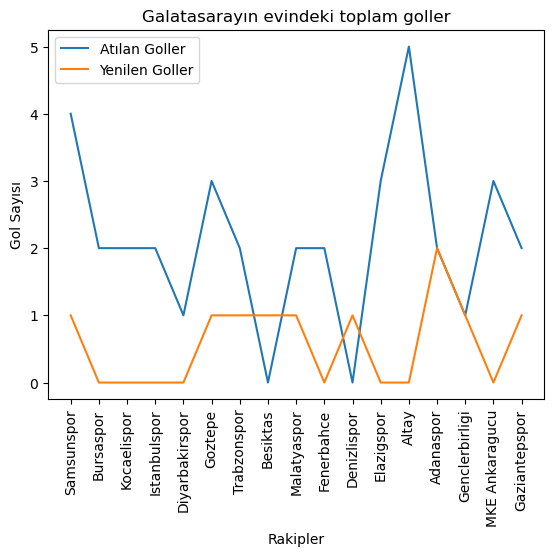

In [153]:
sns.lineplot(x="visitor", y="hgoal", data=gs_df_home2002, label="Atılan Goller")
sns.lineplot(x="visitor", y="vgoal", data=gs_df_home2002, label="Yenilen Goller")
plt.xlabel("Rakipler")
plt.ylabel("Gol Sayısı")
plt.title("Galatasarayın evindeki toplam goller")
plt.legend()
plt.xticks(rotation=90)
plt.show()

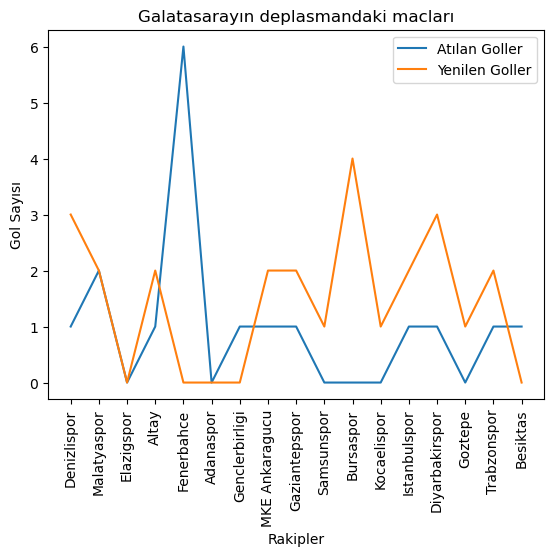

In [155]:
sns.lineplot(x="home", y="hgoal", data=gs_df_visitor2002, label="Atılan Goller")
sns.lineplot(x="home", y="vgoal", data=gs_df_visitor2002, label="Yenilen Goller")
plt.xlabel("Rakipler")
plt.ylabel("Gol Sayısı")
plt.title("Galatasarayın deplasmandaki macları")
plt.legend()
plt.xticks(rotation=90)
plt.show()

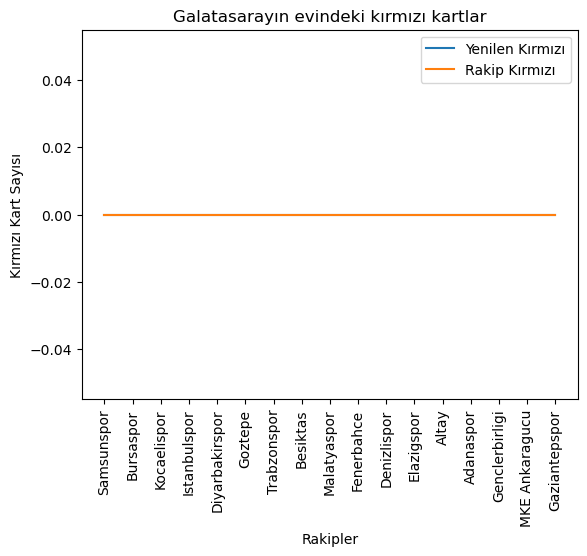

In [158]:
sns.lineplot(x="visitor", y="home_red_card", data=gs_df_home2002, label="Yenilen Kırmızı")
sns.lineplot(x="visitor", y="visitor_red_card", data=gs_df_home2002, label="Rakip Kırmızı")

plt.xlabel("Rakipler")
plt.ylabel("Kırmızı Kart Sayısı")
plt.title("Galatasarayın evindeki kırmızı kartlar")
plt.legend()
plt.xticks(rotation=90)
plt.show()

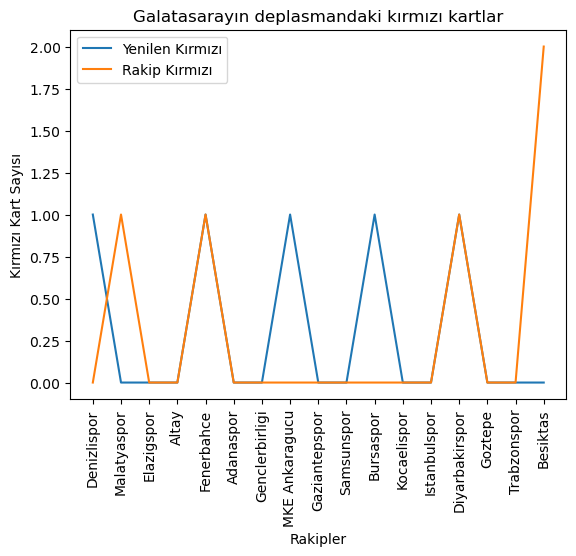

In [160]:
sns.lineplot(x="home", y="home_red_card", data=gs_df_visitor2002, label="Yenilen Kırmızı")
sns.lineplot(x="home", y="visitor_red_card", data=gs_df_visitor2002, label="Rakip Kırmızı")

plt.xlabel("Rakipler")
plt.ylabel("Kırmızı Kart Sayısı")
plt.title("Galatasarayın deplasmandaki kırmızı kartlar")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [161]:
derbiler("Galatasaray", 2002)

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,hgoal_half,vgoal_half,fans,home_red_card,visitor_red_card
0,2002-11-16,2002,13,Galatasaray,Trabzonspor,2-1,2,1,1,1,1,0,0
1,2002-12-08,2002,16,Galatasaray,Besiktas,0-1,0,1,0,0,1,0,0
2,2003-03-08,2002,23,Galatasaray,Fenerbahce,2-0,2,0,2,0,1,0,0
3,2002-11-06,2002,6,Fenerbahce,Galatasaray,6-0,6,0,2,0,1,1,1
4,2003-05-04,2002,30,Trabzonspor,Galatasaray,1-2,1,2,1,1,1,0,0
5,2003-05-25,2002,33,Besiktas,Galatasaray,1-0,1,0,0,0,1,0,2


0 2 1
1 1 1


([<matplotlib.patches.Wedge at 0x7feff3518650>,
 [Text(-0.5500000148652439, 0.9526279355804299, 'Kazandı'),
  Text(-0.5499999702695119, -0.9526279613277874, 'Kaybetti'),
  Text(0.9526279098330698, 0.5500000594609757, 'Berabere')],
 [Text(-0.3000000081083148, 0.5196152375893254, '16.7%'),
  Text(-0.29999998378337006, -0.5196152516333385, '50.0%'),
  Text(0.5196152235453108, 0.30000003243325946, '33.3%')])

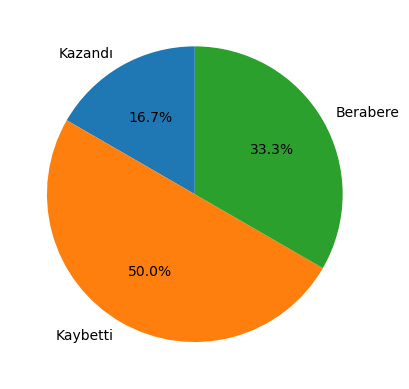

In [239]:
def derbi_sonuclari(teamname, date):
    derbi = derbiler(teamname, date)
    home_win = len(derbi[(derbi["home"] == teamname) & (derbi["hgoal"] > derbi["vgoal"])])
    home_loss = len(derbi[(derbi["home"] == teamname) & (derbi["hgoal"] < derbi["vgoal"])])
    home_draw = len(derbi[(derbi["home"] == teamname) & (derbi["hgoal"] == derbi["vgoal"])])
    visitor_win = len(derbi[(derbi["visitor"] == teamname) & (derbi["vgoal"] > derbi["hgoal"])])
    visitor_loss = len(derbi[(derbi["visitor"] == teamname) & (derbi["vgoal"] < derbi["hgoal"])])
    visitor_draw = len(derbi[(derbi["visitor"] == teamname) & (derbi["vgoal"] == derbi["hgoal"])])
    home_labels = []
    home_y = [0, 0, 0]

    if home_win != 0 or visitor_win != 0:
        home_y[0] += home_win
        home_y[0] += visitor_win
        home_labels.append("Kazandı")

    if home_loss != 0 or visitor_loss != 0:
        home_y[1] += home_loss
        home_y[1] += visitor_loss
        home_labels.append("Kaybetti")

    if home_draw != 0 or visitor_draw != 0:
        home_y[2] += home_draw
        home_y[2] += visitor_loss
        home_labels.append("Berabere")
    
    print(home_win, home_loss, home_draw)
    print(visitor_win, visitor_loss, visitor_draw)
    
    return home_y, home_labels

home_y, home_labels = derbi_sonuclari("Galatasaray", 2003)
plt.pie(home_y, labels=home_labels, startangle=90, autopct='%1.1f%%')